#Introduction

Hana Rifdah Sakinah - 006
---
**Source** : https://www.kaggle.com/teejmahal20/airline-passenger-satisfaction

**Problem Statement**

This dataset contains US airline passenger satisfaction survey. The airline passenger satisfaction survey is an in-depth feedback questionnaire that an airline sends to its passenger to collect feedback about the flying experience.

**Goals**


*   Predict passenger satisfication

**Dataset Information**

*   **Gender**: Gender of the passengers (Female, Male)

*  **Customer** Type: The customer type (Loyal customer, disloyal customer)

*    **Age**: The actual age of the passengers

*    **Type of Travel**: Purpose of the flight of the passengers (Personal Travel, Business Travel)

*   **Class**: Travel class in the plane of the passengers (Business, Eco, Eco Plus)

*   **Flight distance**: The flight distance of this journey

*    **Inflight wifi service**: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)

*    **Departure/Arrival time convenient**: Satisfaction level of Departure/Arrival time convenient

* **Ease of Online booking**: Satisfaction level of online booking

* **Gate location**: Satisfaction level of Gate location

* **Food and drink**: Satisfaction level of Food and drink

* **Online boarding**: Satisfaction level of online boarding

* **Seat comfort**: Satisfaction level of Seat comfort

* **Inflight entertainment**: Satisfaction level of inflight entertainment

* **On-board service**: Satisfaction level of On-board service

* **Leg room service**: Satisfaction level of Leg room service

* **Baggage handling**: Satisfaction level of baggage handling

* **Check-in service**: Satisfaction level of Check-in service

*  **Inflight service**: Satisfaction level of inflight service

*  **Cleanliness**: Satisfaction level of Cleanliness

*  **Departure Delay in Minutes**: Minutes delayed when departure

*  **Arrival Delay in Minutes**: Minutes delayed when Arrival

*  **Satisfaction**: Airline satisfaction level(Satisfied, neutral or dissatisfied)


In [ ]:
!pip install feature-engine
!pip install sweetviz
import warnings 
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sweetviz as sv
import sklearn

from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer, make_column_selector as selector
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, f1_score
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from sklearn.utils import shuffle

In [ ]:
sklearn. __version__ 

'1.0.2'

#Data Loading

In [ ]:
X_train = pd.read_csv('https://raw.githubusercontent.com/hanarifdahs/datasets/master/train.csv')
X_test = pd.read_csv('https://raw.githubusercontent.com/hanarifdahs/datasets/master/test.csv')

In [ ]:
X_train

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,3,2,2,2,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,4,2,4,5,5,5,5,5,5,5,4,0,0.0,satisfied
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,3,4,1,5,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,5,1,1,1,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [ ]:
X_test

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,3,4,3,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,5,4,5,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,2,2,2,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,3,4,4,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,4,1,2,2,2,2,2,4,2,4,0,20.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,25971,78463,Male,disloyal Customer,34,Business travel,Business,526,3,3,3,1,4,3,4,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
25972,25972,71167,Male,Loyal Customer,23,Business travel,Business,646,4,4,4,4,4,4,4,4,4,5,5,5,5,4,0,0.0,satisfied
25973,25973,37675,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,1,5,2,1,2,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
25974,25974,90086,Male,Loyal Customer,14,Business travel,Business,1127,3,3,3,3,4,4,4,4,3,2,5,4,5,4,0,0.0,satisfied


In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [ ]:
X_train.shape, X_test.shape

((103904, 25), (25976, 25))

In [ ]:
X_train.isnull().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

In [ ]:
X_test.isnull().sum()

Unnamed: 0                            0
id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0


In [ ]:
X_train.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,51951.500000,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,29994.645522,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25975.750000,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,51951.500000,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,77927.250000,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


#EDA

**Use sweetviz library to analyze the data**

                                             |          | [  0%]   00:00 -> (? left)


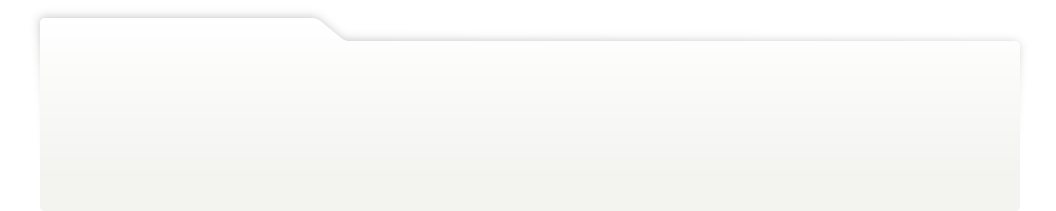
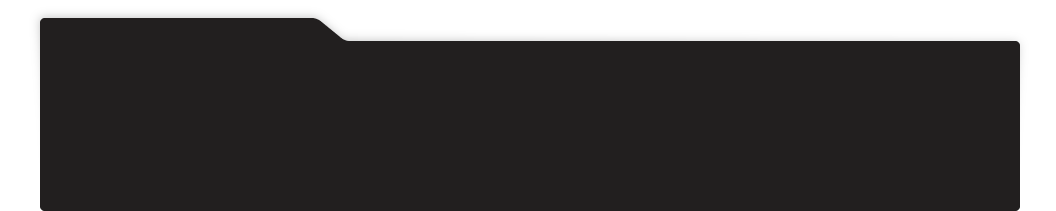
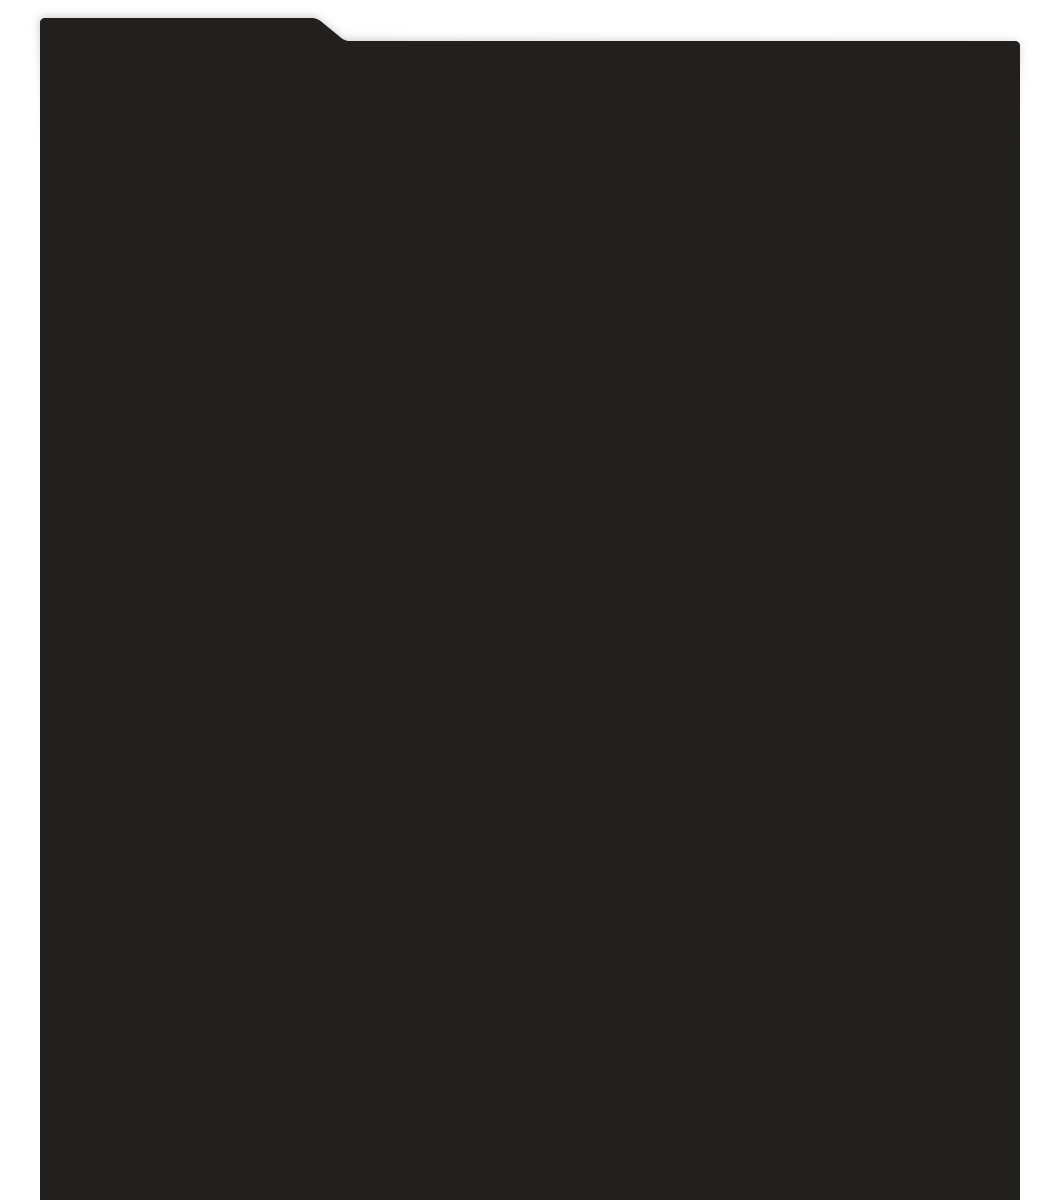
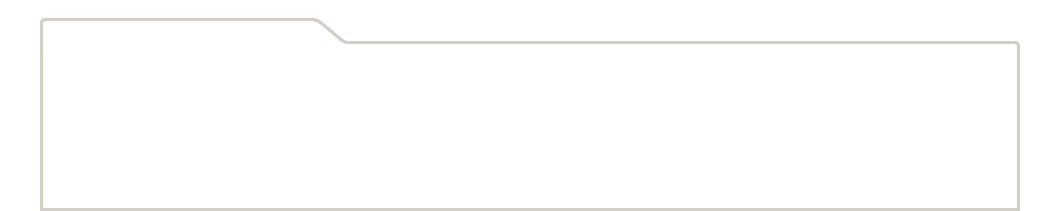
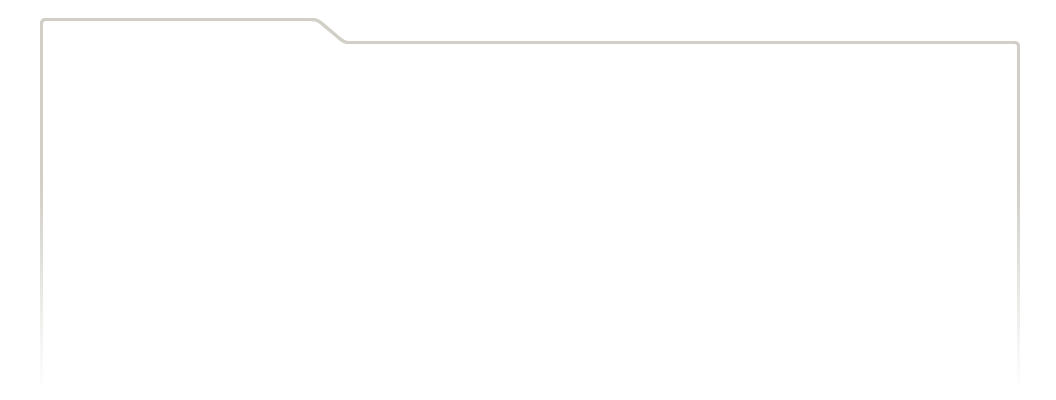
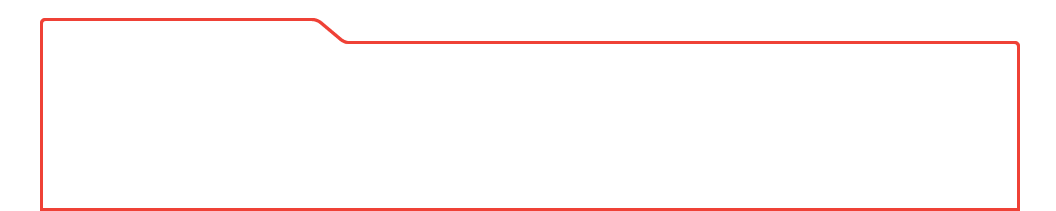
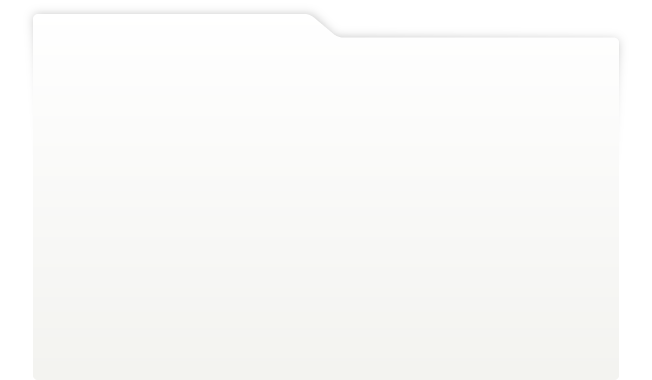
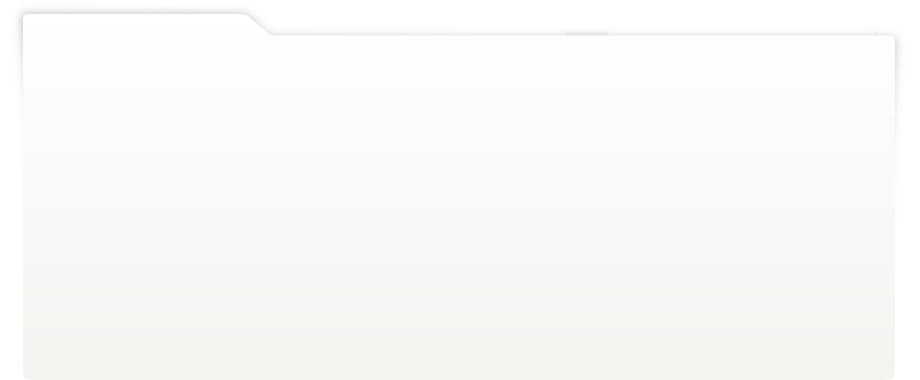
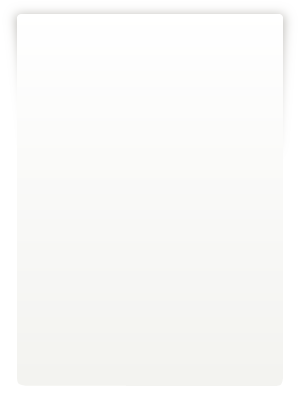
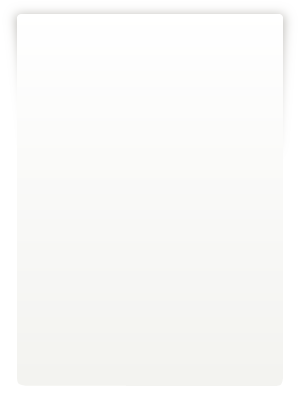
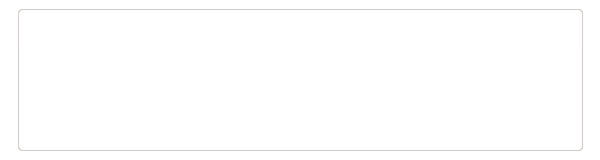
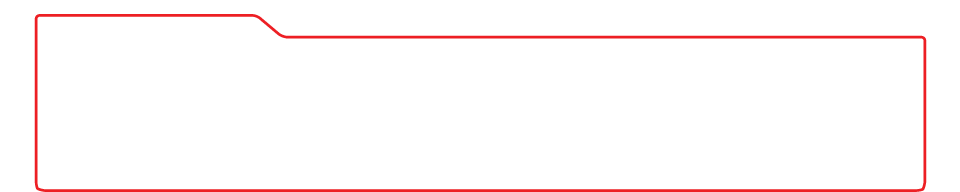
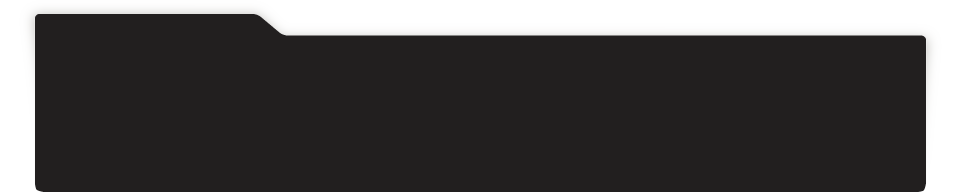
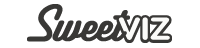
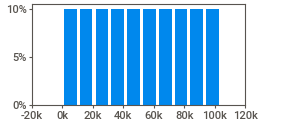
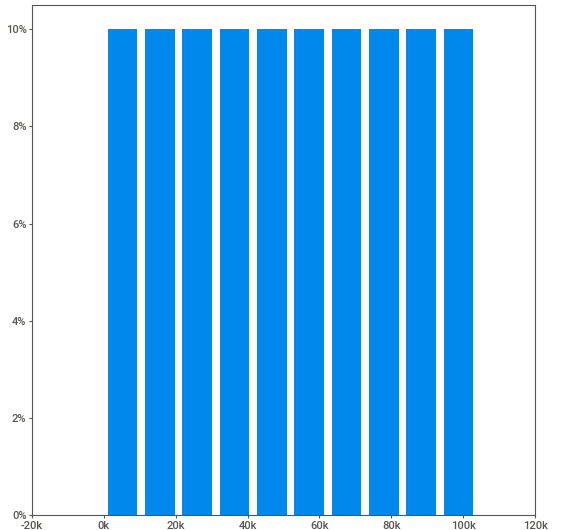
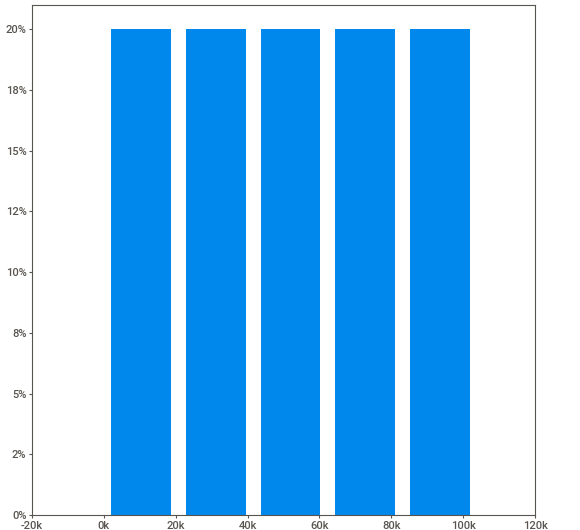
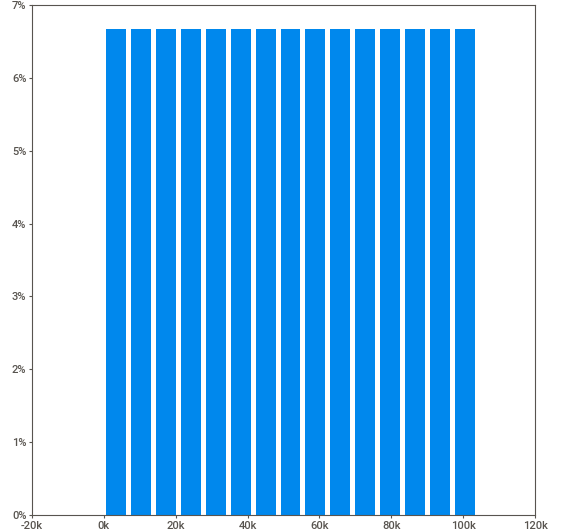
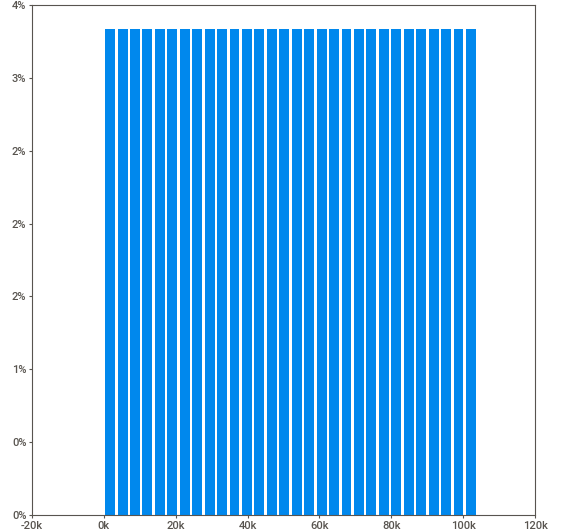
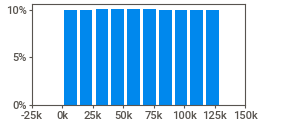
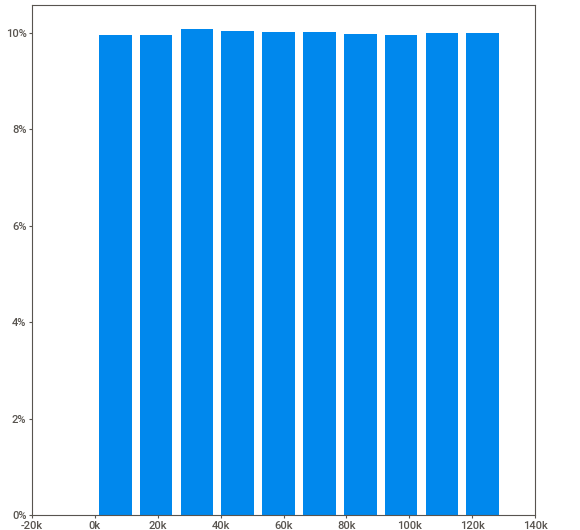
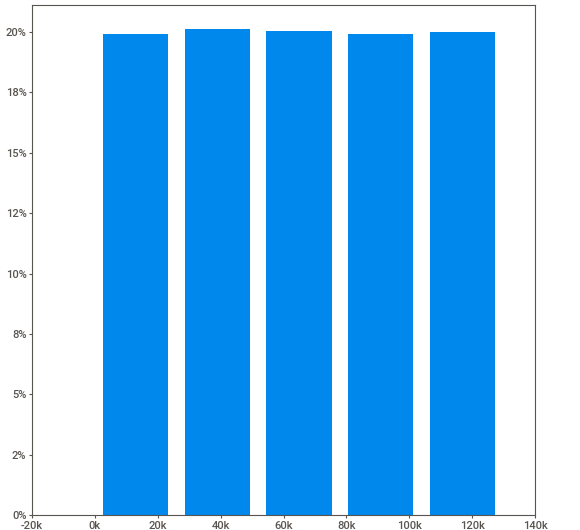
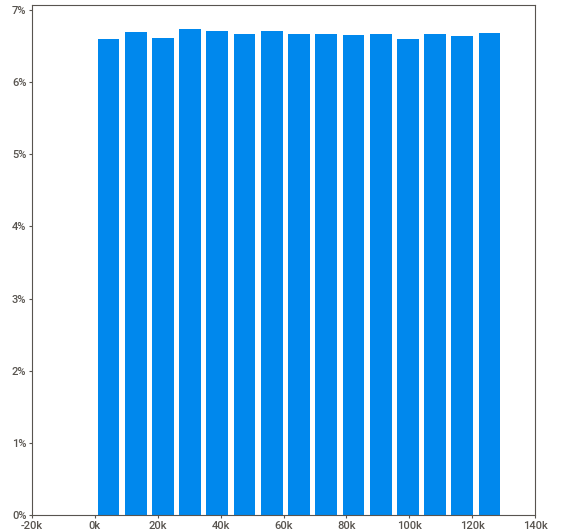
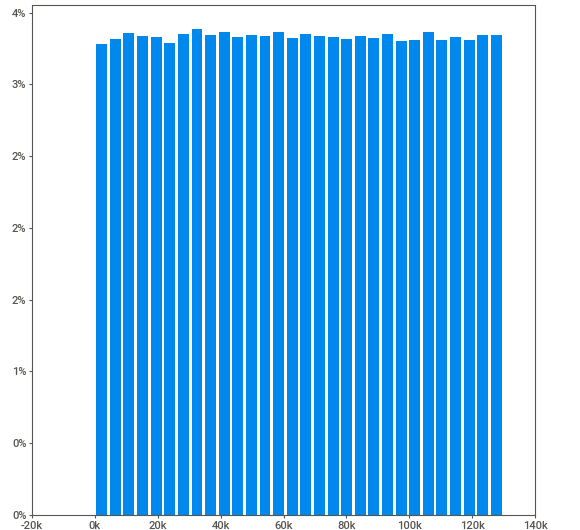
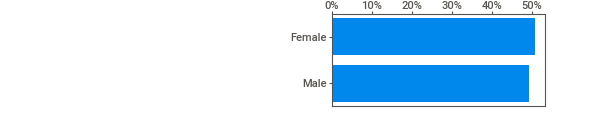
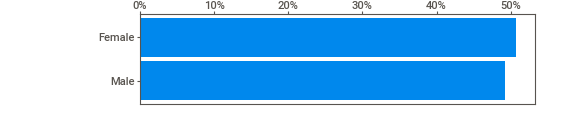
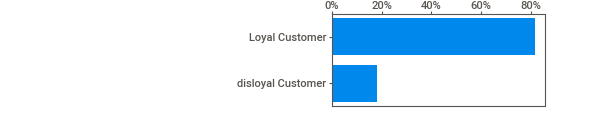
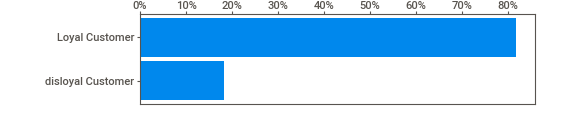
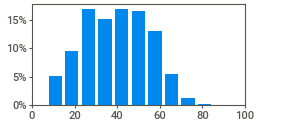
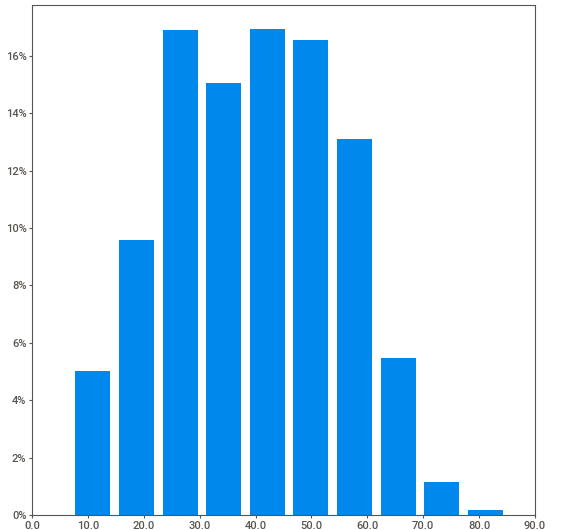
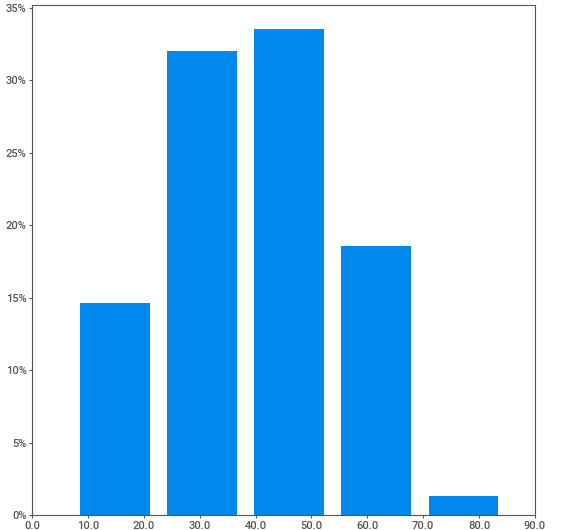
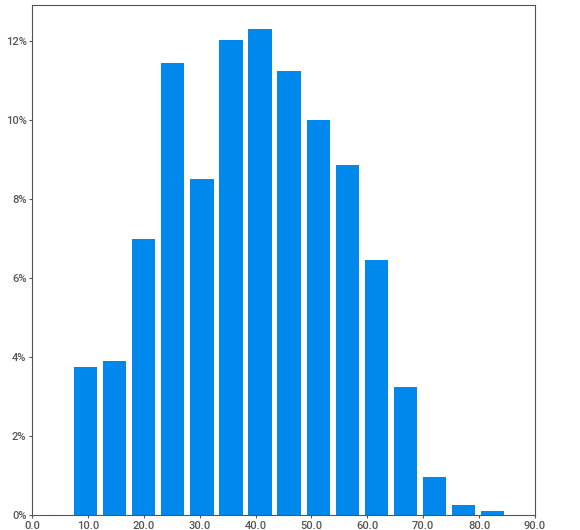
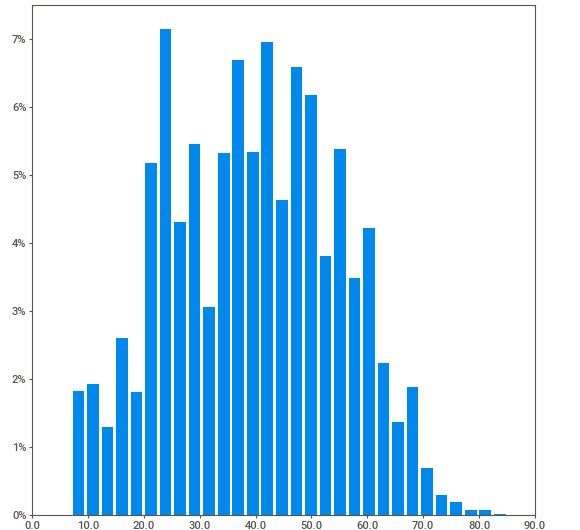
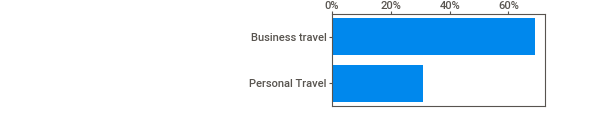
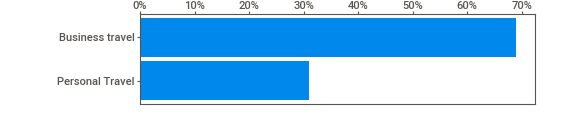
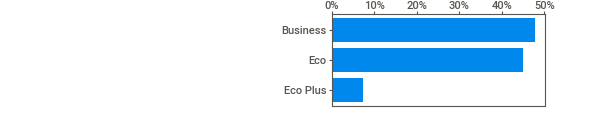
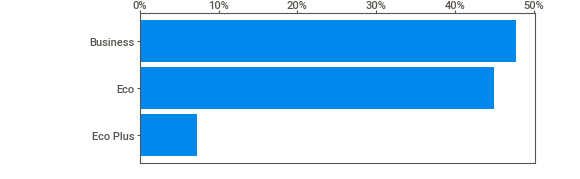
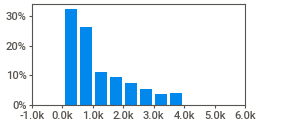
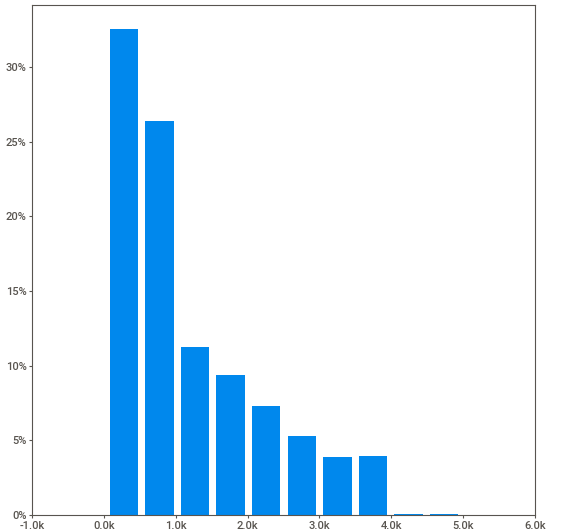
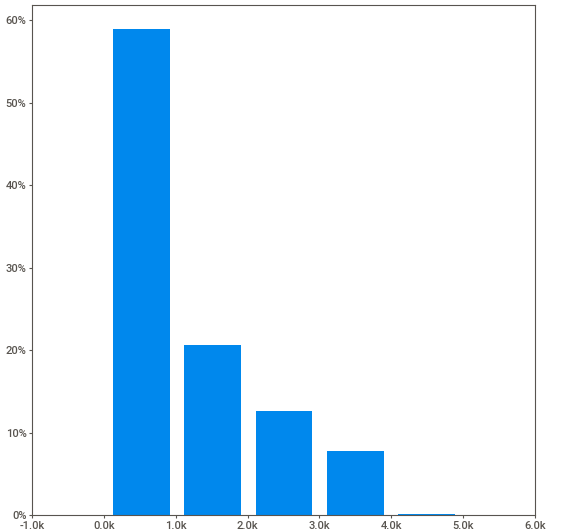
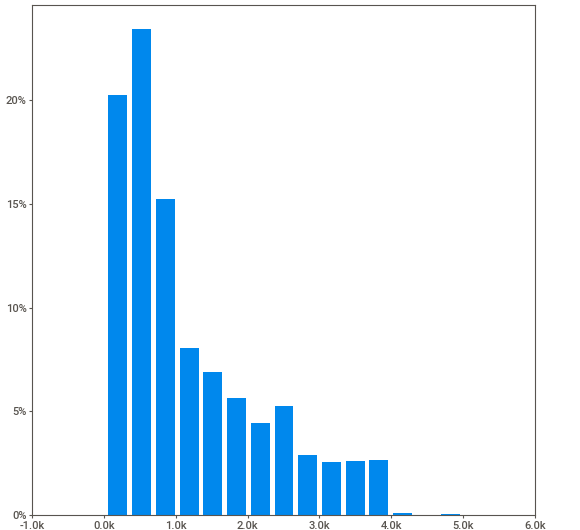
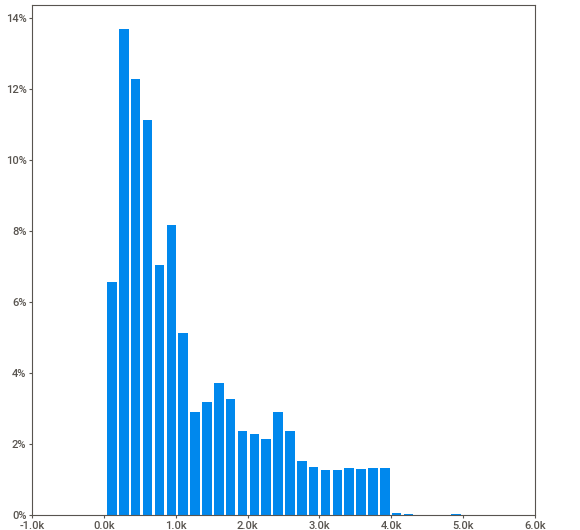
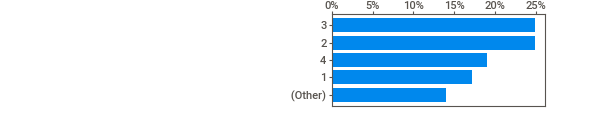
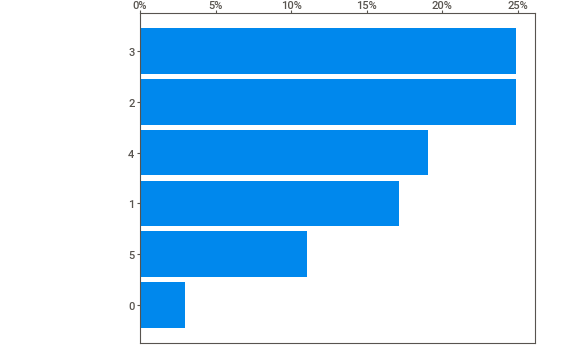
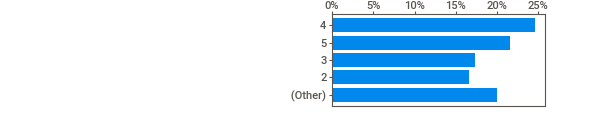
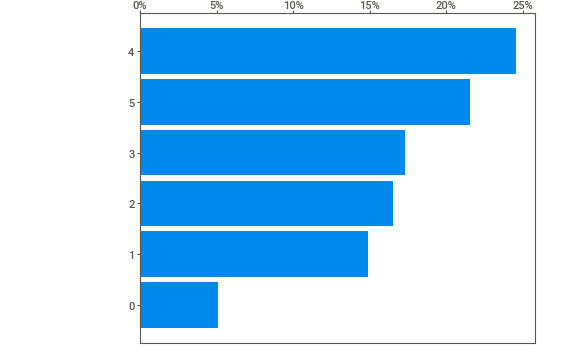
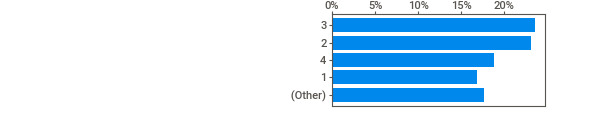
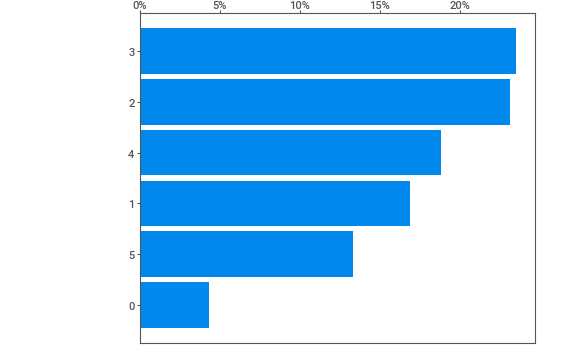
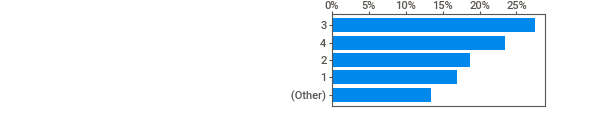
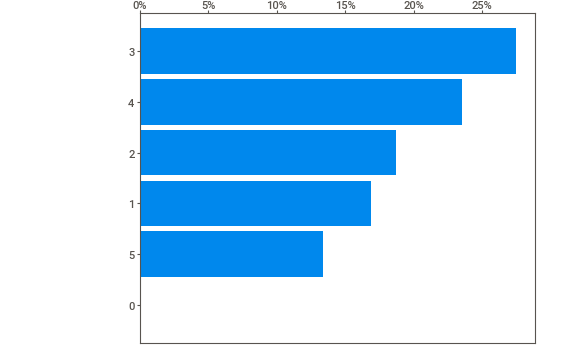
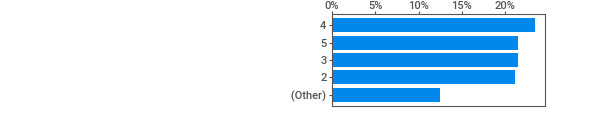
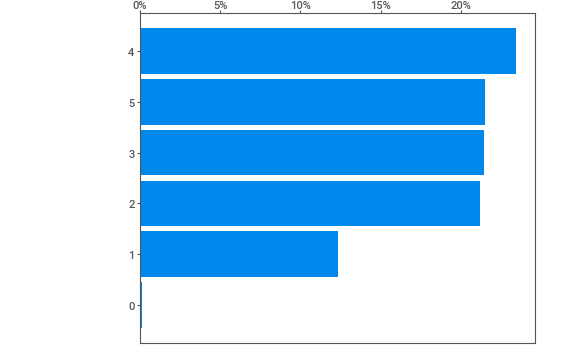
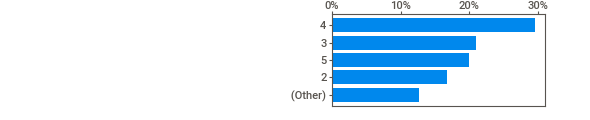
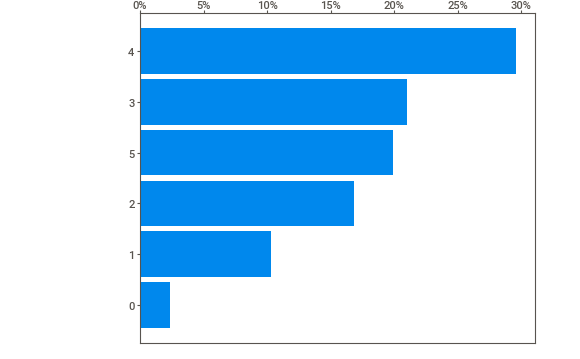
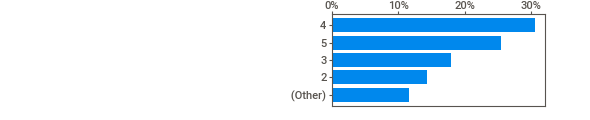
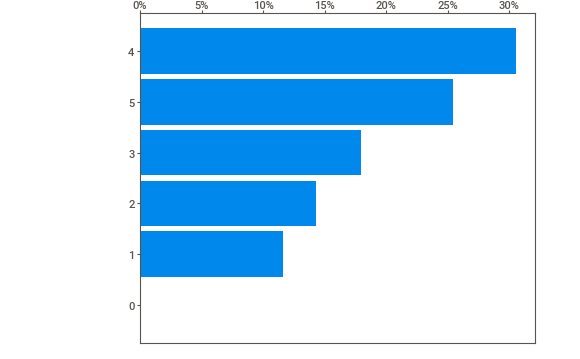
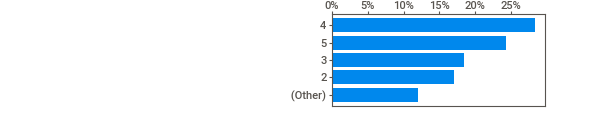
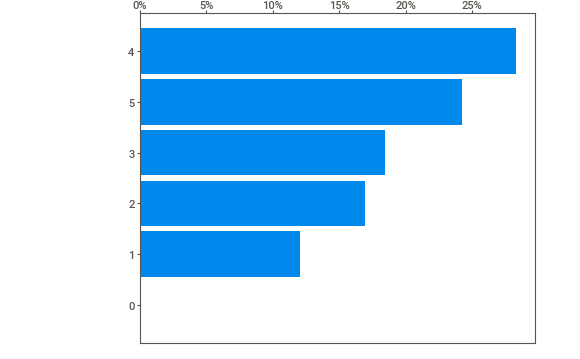
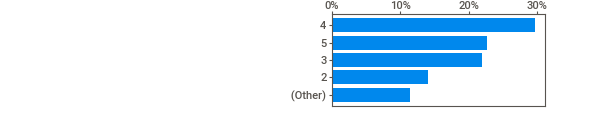
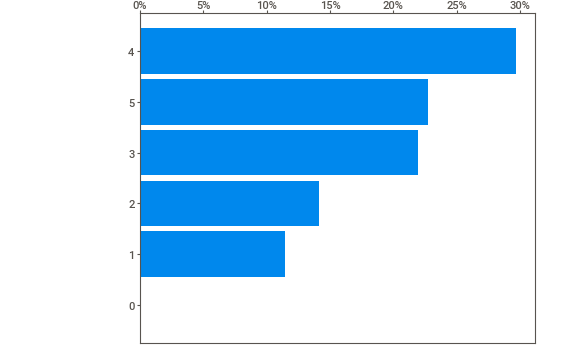
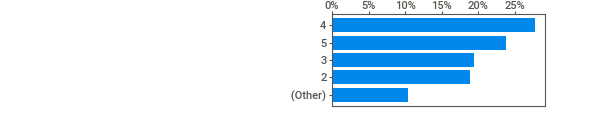
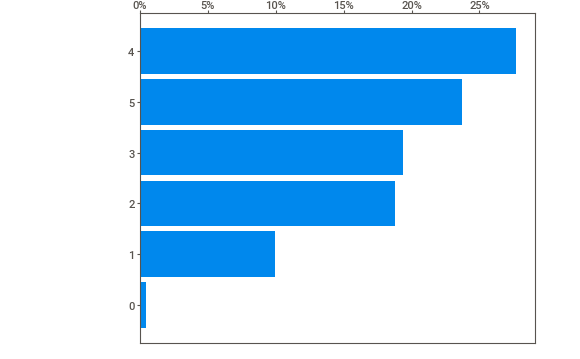
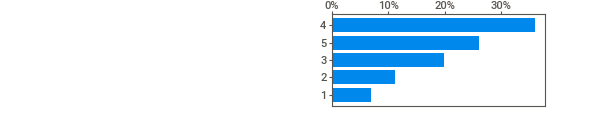
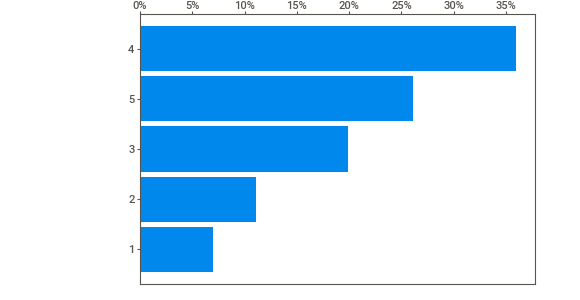
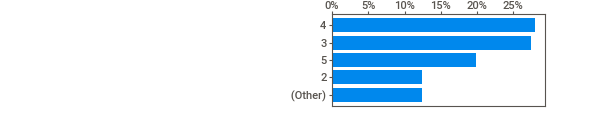
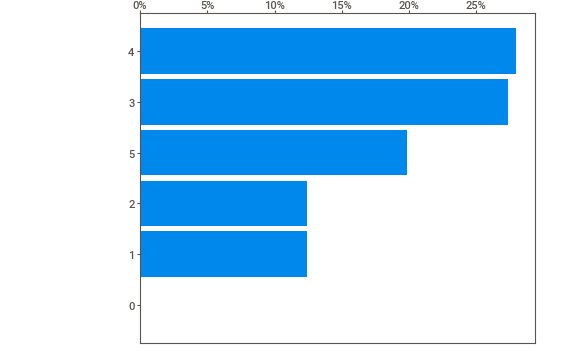
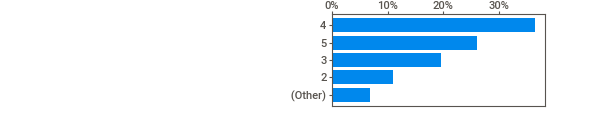
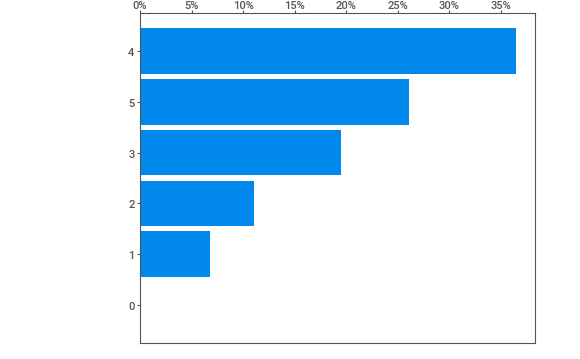
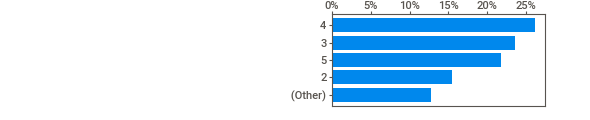
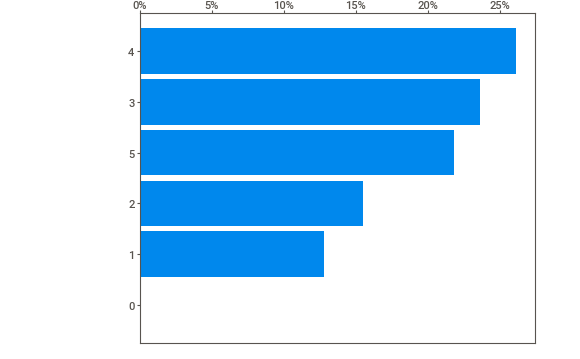
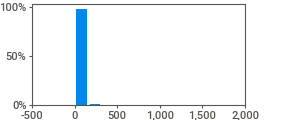
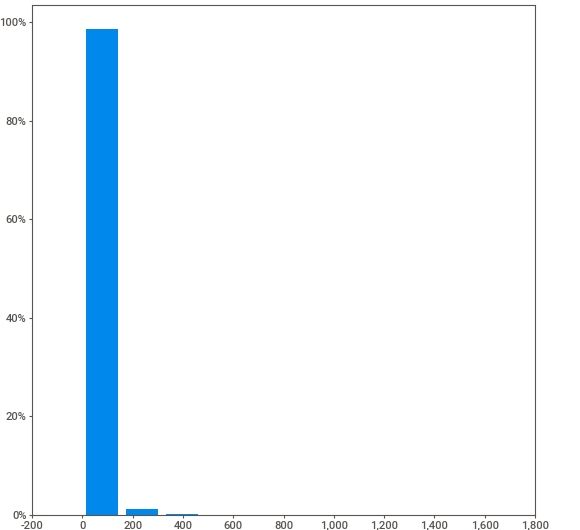
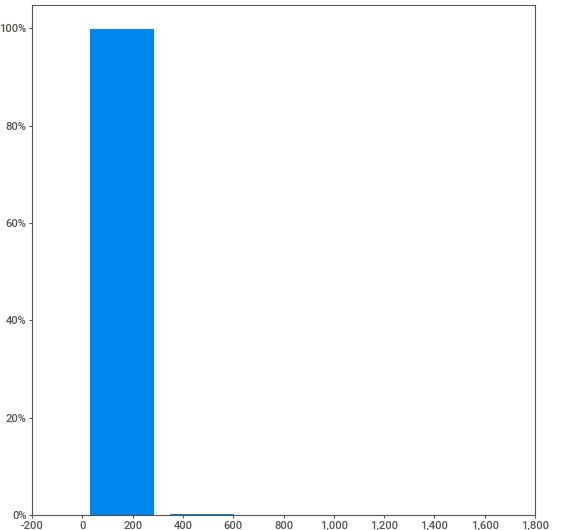
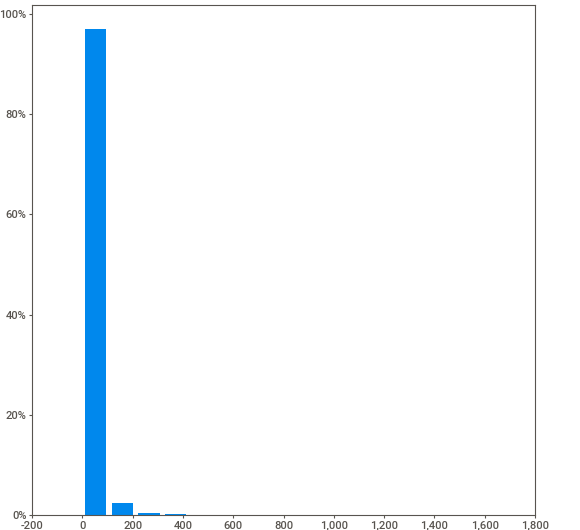
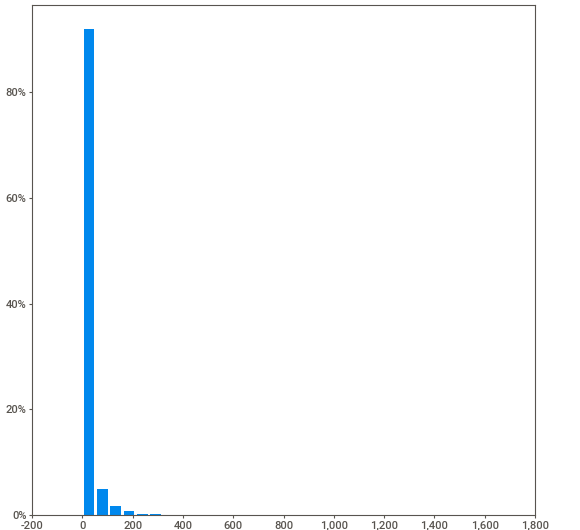
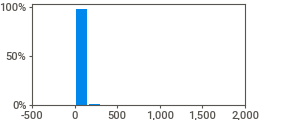
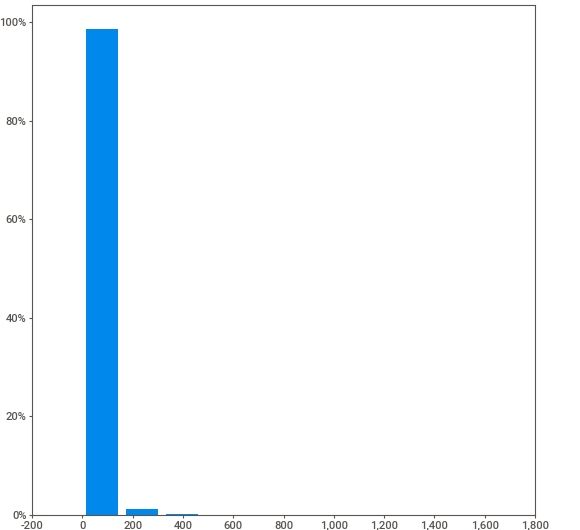
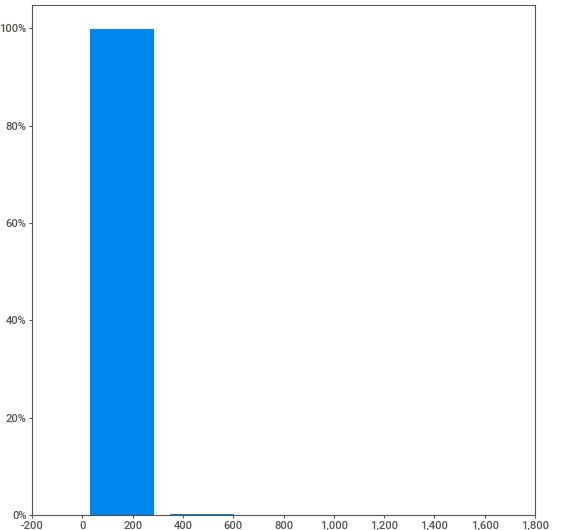
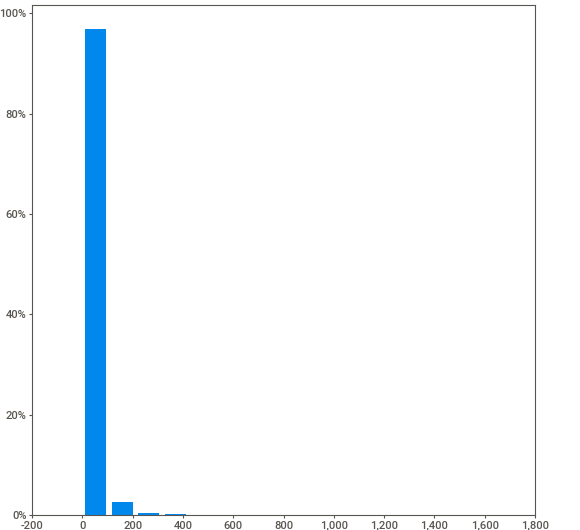
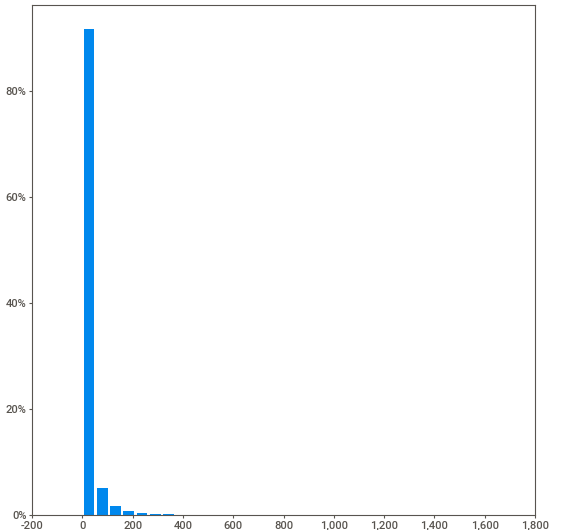
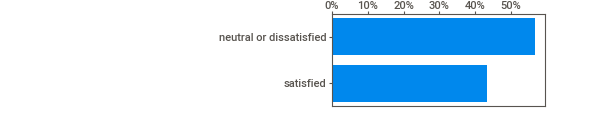
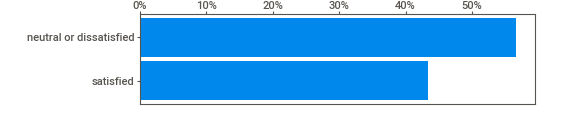
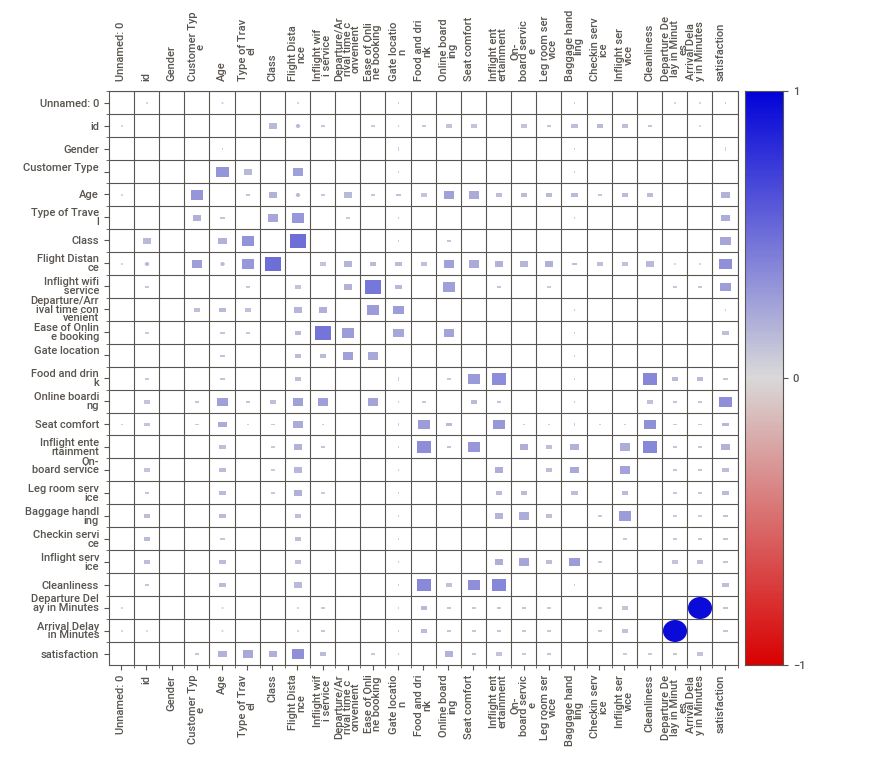
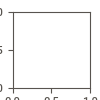

In [ ]:
sweeet_report = sv.analyze(X_train)
sweeet_report.show_notebook(w=1500, h = 800, scale = 0.8, layout = 'widescreen')

From the summary result from Sweetviz,

* Arrival Delay in minutes, Departure Delay in minutes, flight distance has skewed distribution

* Age has normal distribution

* Arival delay in minutes and Age have missing values



**How many categorical columns in this dataset?**

In [ ]:
cat_features = [feature for feature in X_train.columns if X_train[feature].dtypes == 'O']
print('Number of categorical variables: ', len(cat_features))
print('*'*80)
print('Categorical variables column name:',cat_features)

Number of categorical variables:  5
********************************************************************************
Categorical variables column name: ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']


**Comparison between each categorical columns based on the target variable**

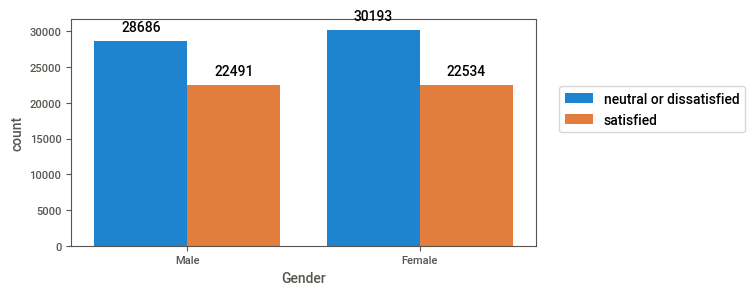

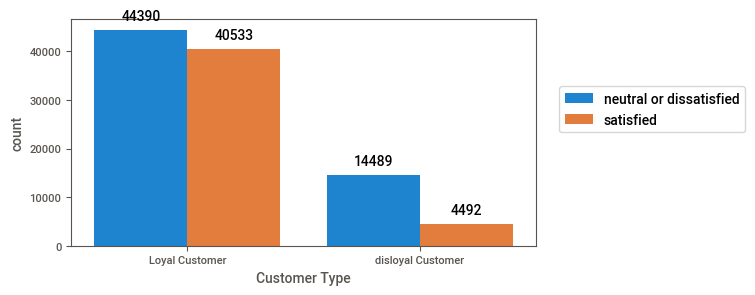

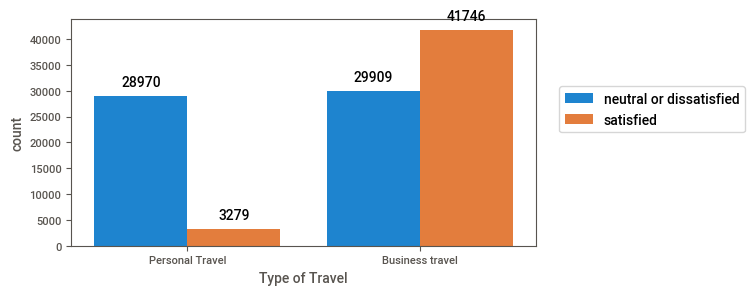

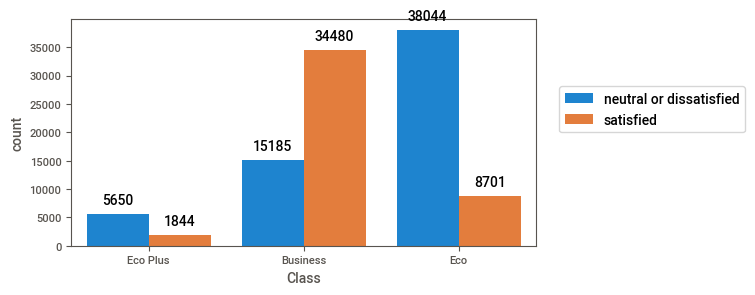

In [ ]:
for col in cat_features[:-1]:
    plt.figure(figsize=(6,3), dpi=100)
    fig = sns.countplot(data=X_train,x=col,hue ='satisfaction')
    for p in fig.patches:
      fig.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width()/2., p.get_height()),ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

    plt.legend(loc=(1.05,0.5))

From the graph, we can see that:
* Both female and male equally concerned about the satisfaction, means gender doesn't give a full impact on the result. So we'll likely to drop it.
* Loyal customer gives a high result on the neutral or dissatisfied level. This should be highlighted to maintain the loyal customers.
* Business traveler satisfied more with the airline rather than the personal traveler
* Passenger in business class highly satisfied rather than passenger in economy class highly neutral or dissatisfied.

**How many numerical columns in the dataset?**

In [ ]:
numerical_features = [feature for feature in X_train.columns if X_train[feature].dtypes != 'O']
print('Number of numerical variables: ', len(numerical_features))
print('*'*80)
print('Numerical Variables Column: ',numerical_features)

Number of numerical variables:  20
********************************************************************************
Numerical Variables Column:  ['Unnamed: 0', 'id', 'Age', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']


**Comparison between target variable in each numerical columns**

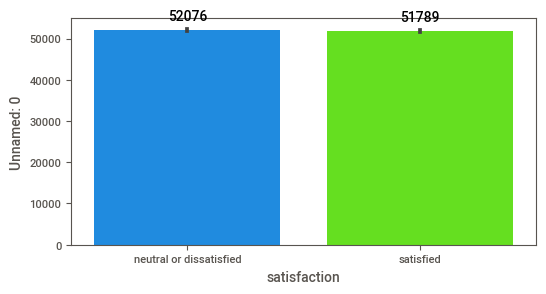

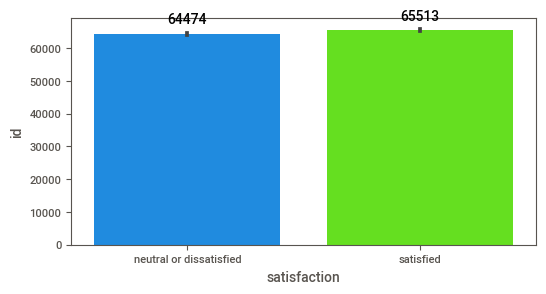

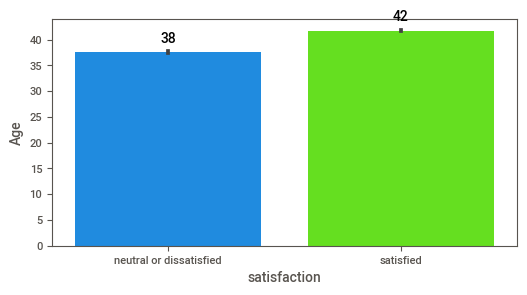

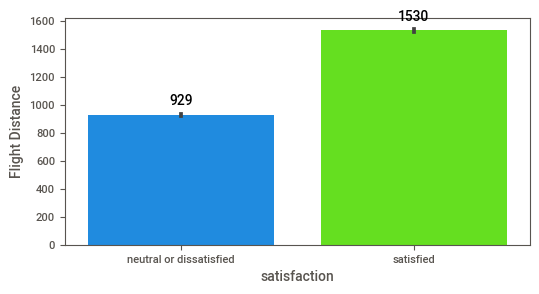

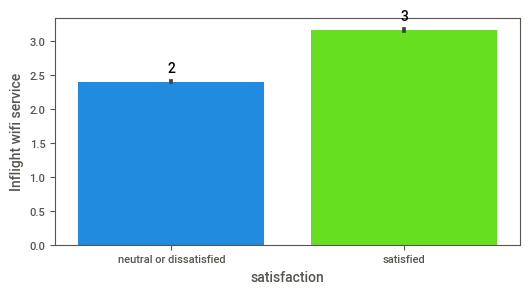

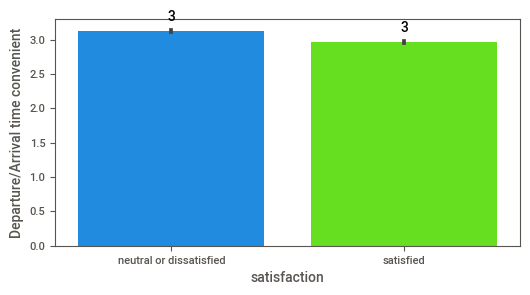

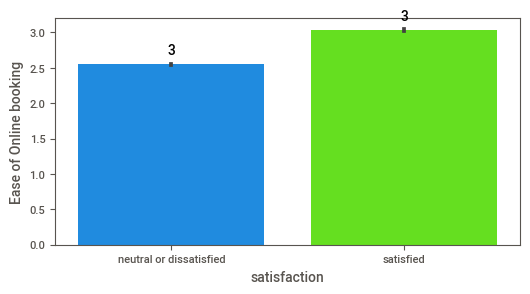

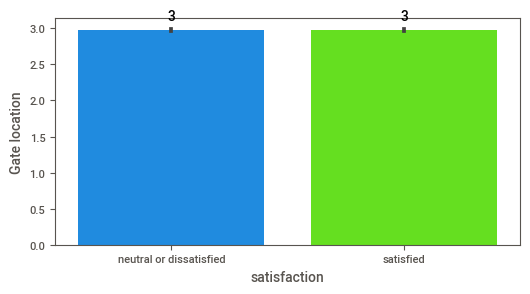

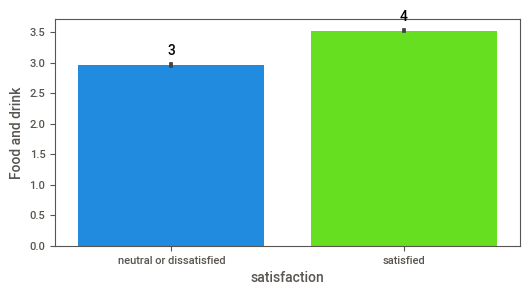

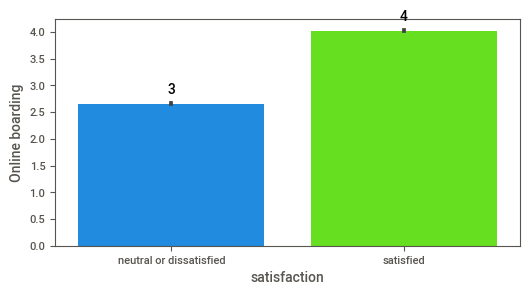

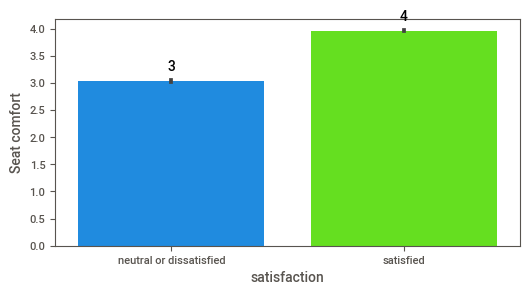

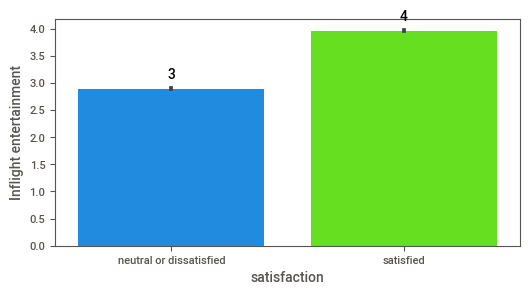

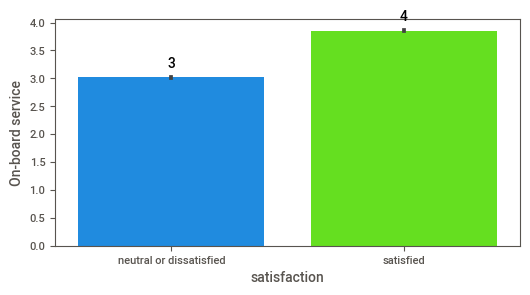

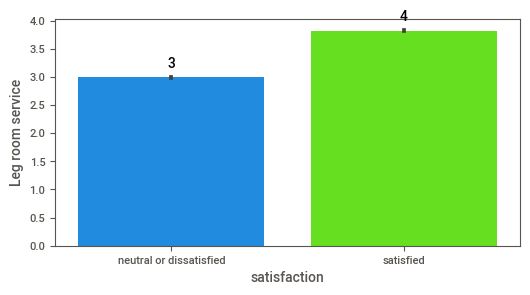

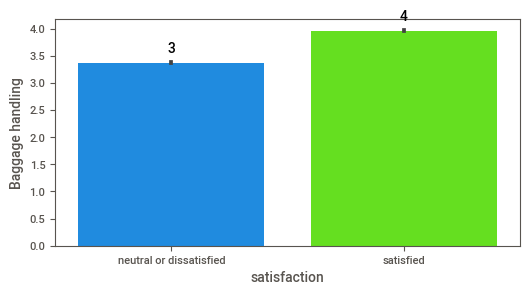

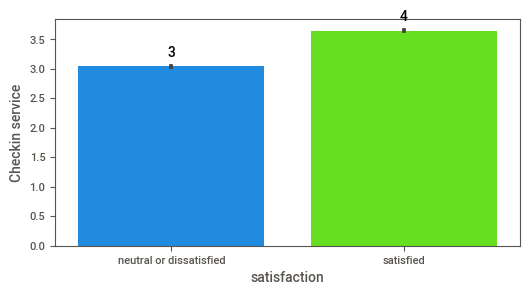

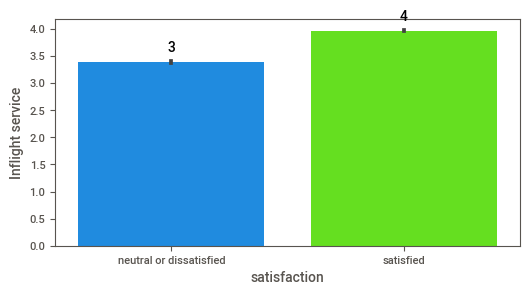

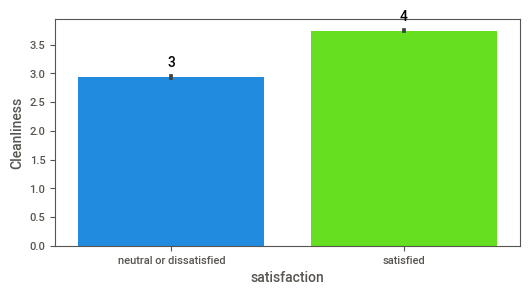

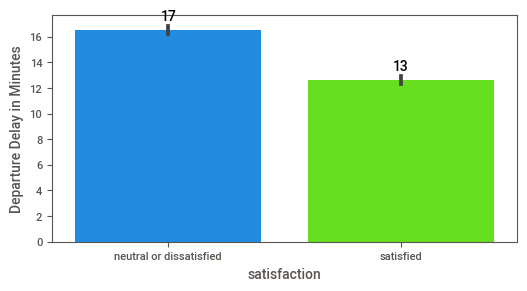

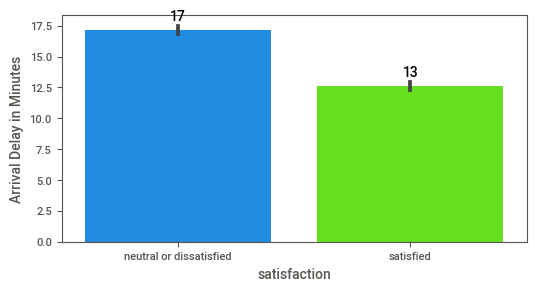

In [ ]:
#Plotting the barplot of numerical features
for col in numerical_features:
    plt.figure(figsize=(6,3), dpi=100)
    fig = sns.barplot(data=X_train,x='satisfaction',y=col,palette='gist_rainbow_r')
    for p in fig.patches:
      fig.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width()/2., p.get_height()),ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')


From the graph, we can see that Gate location doesn't giving much impact since it gives the same score.

**How is the distribution of the target variable?**

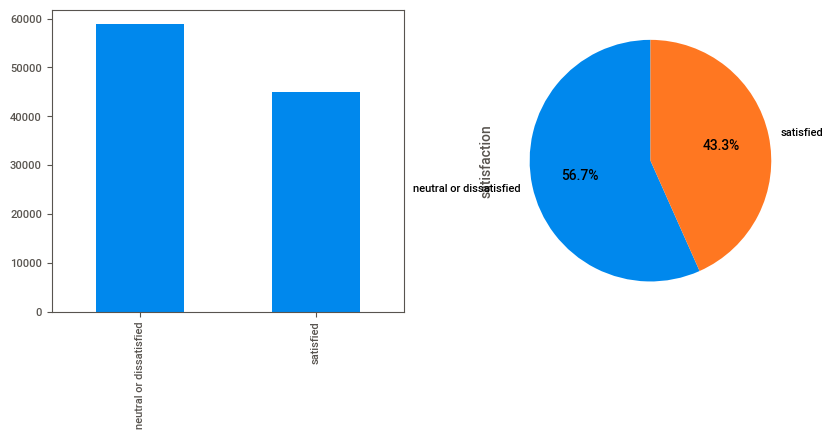

In [ ]:
fig, axs = plt.subplots(ncols=2, figsize=(10,4))
X_train['satisfaction'].value_counts().plot(kind='bar', ax=axs[0])
X_train['satisfaction'].value_counts().plot.pie(autopct='%1.1f%%', startangle = 90, ax=axs[1])

Neutral or dissatisfied passenger higher than satisfed passenger by 13.4%

**Age distribution**

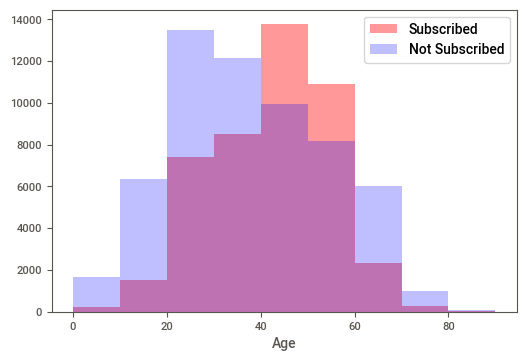

In [ ]:
bins = range(0, 100, 10)
ax = sns.distplot(X_train.Age[X_train.satisfaction == 'satisfied'], color = 'red', kde = False, bins = bins, label = 'Subscribed')
sns.distplot(X_train.Age[X_train.satisfaction == 'neutral or dissatisfied'], ax = ax, color = 'blue', kde = False,hist_kws=dict(alpha=0.25), bins = bins, label = 'Not Subscribed')
plt.legend()
plt.show()

Age seems quiet balance means it's not necessarily affected much on the target variable

**How is the correlation between Departure Delay and Arrival Delay?**

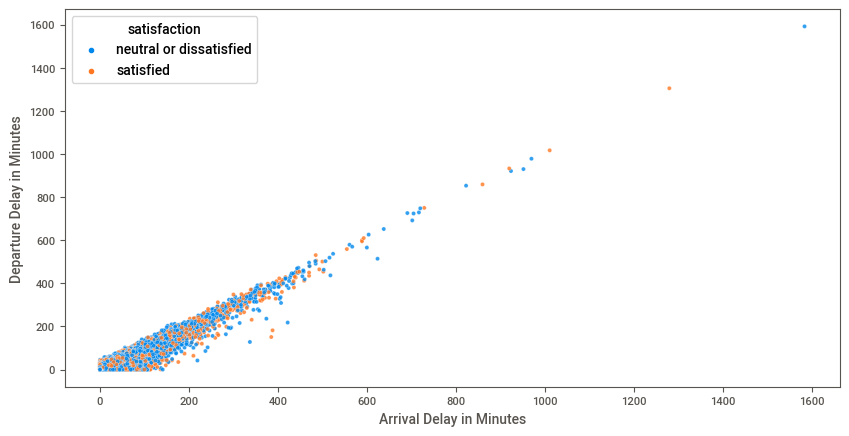

In [ ]:
plt.figure(figsize=(10,5), dpi=100)
sns.scatterplot(data=X_train,x='Arrival Delay in Minutes',y='Departure Delay in Minutes',hue='satisfaction', alpha=0.8)

Looks like the arrival and departure delay has a linear relationship, we will check furtherly on the correlation between them. Interestingly there are 2 passengers who waited the delay more than 1000 minutes or 16 hours and still satisfied.

**Correlation between features**

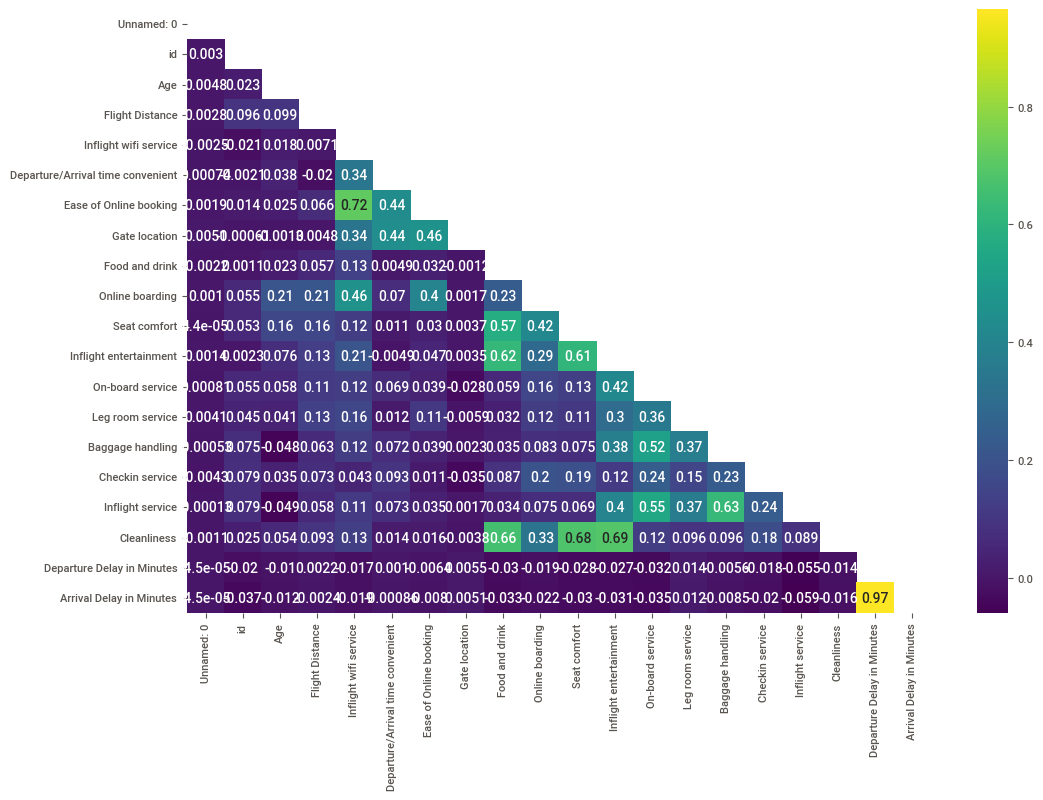

In [ ]:
plt.subplots(figsize=(12,8))
mask = np.triu(np.ones_like(X_train.corr()))
sns.heatmap(X_train.corr(), annot = True, cmap='viridis', mask=mask)

From the correlation matrix, we can see that Departure delay and arrival delay has a high correaltion, which is 97%. We will drop one of them later. 

**How about the correlation value between features and label?**

In [ ]:
X_train['satisfaction'] = X_train['satisfaction'].map({'satisfied': 1, 'neutral or dissatisfied':0})
target = ['satisfaction']
corr = X_train.corr()
print(corr['satisfaction'].sort_values(ascending=False), '\n')

satisfaction                         1.000000
Online boarding                      0.503557
Inflight entertainment               0.398059
Seat comfort                         0.349459
On-board service                     0.322383
Leg room service                     0.313131
Cleanliness                          0.305198
Flight Distance                      0.298780
Inflight wifi service                0.284245
Baggage handling                     0.247749
Inflight service                     0.244741
Checkin service                      0.236174
Food and drink                       0.209936
Ease of Online booking               0.171705
Age                                  0.137167
id                                   0.013734
Gate location                        0.000682
Unnamed: 0                          -0.004731
Departure Delay in Minutes          -0.050494
Departure/Arrival time convenient   -0.051601
Arrival Delay in Minutes            -0.057582
Name: satisfaction, dtype: float64

The highest correlation value to the label is online boarding feature

In [ ]:
X_test['satisfaction'] = X_test['satisfaction'].map({'satisfied': 1, 'neutral or dissatisfied':0})
target = ['satisfaction']
corr = X_test.corr()
print(corr['satisfaction'].sort_values(ascending=False), '\n')

satisfaction                         1.000000
Online boarding                      0.494526
Inflight entertainment               0.398951
Seat comfort                         0.346275
On-board service                     0.321491
Cleanliness                          0.314350
Leg room service                     0.309629
Flight Distance                      0.295292
Inflight wifi service                0.280395
Baggage handling                     0.252415
Inflight service                     0.245573
Checkin service                      0.241495
Food and drink                       0.216868
Ease of Online booking               0.157709
Age                                  0.121697
id                                   0.010965
Unnamed: 0                           0.001511
Gate location                       -0.016627
Departure Delay in Minutes          -0.051635
Arrival Delay in Minutes            -0.061059
Departure/Arrival time convenient   -0.064798
Name: satisfaction, dtype: float64

#Data Preprocessing

##Split Data

The author from the dataset has seperate the dataset into train and test set by 80% in the train set and 20% in the test set

In [ ]:
y_train = X_train['satisfaction']
X_train.drop('satisfaction', axis = 1, inplace = True)

y_test = X_test['satisfaction']
X_test.drop('satisfaction', axis = 1, inplace = True)

##Feature Importance

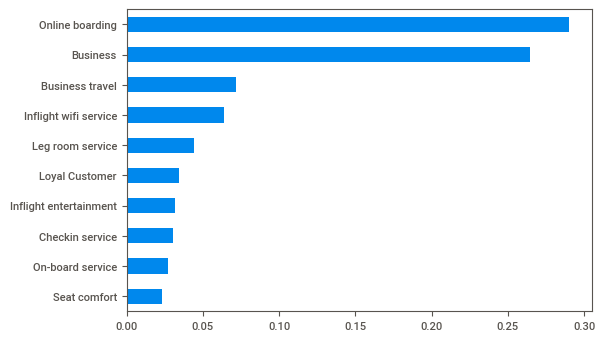

In [ ]:
# fit model no training data
model = XGBClassifier()
X_train_ohe = pd.get_dummies(X_train, prefix='', prefix_sep='', 
                            columns=['Customer Type','Type of Travel','Class', 'Gender'])

model.fit(X_train_ohe, y_train)
# # feature importance
# print(model.feature_importances_)
# # plot
# plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
# plt.show()
feat_importances = pd.Series(model.feature_importances_, index=X_train_ohe.columns)
feat_importances.nlargest(10).plot(kind='barh').invert_yaxis()

From the important features and EDA the impactful features are,

* Class of travel

* Arrival/Departure delays

* Services provided in the flight

##Drop Unnecessary Columns

Based on the EDA, we will drop some of the features that we think it doesn't give a high impact to the prediction

In [ ]:
X_train.drop(['Unnamed: 0','id','Age','Gender','Gate location', 'Arrival Delay in Minutes'], axis=1, inplace=True)

In [ ]:
X_test.drop(['Unnamed: 0','id','Age','Gender','Gate location', 'Arrival Delay in Minutes'], axis=1, inplace=True)

In [ ]:
X_train.columns, X_test.columns

(Index(['Customer Type', 'Type of Travel', 'Class', 'Flight Distance',
        'Inflight wifi service', 'Departure/Arrival time convenient',
        'Ease of Online booking', 'Food and drink', 'Online boarding',
        'Seat comfort', 'Inflight entertainment', 'On-board service',
        'Leg room service', 'Baggage handling', 'Checkin service',
        'Inflight service', 'Cleanliness', 'Departure Delay in Minutes'],
       dtype='object'),
 Index(['Customer Type', 'Type of Travel', 'Class', 'Flight Distance',
        'Inflight wifi service', 'Departure/Arrival time convenient',
        'Ease of Online booking', 'Food and drink', 'Online boarding',
        'Seat comfort', 'Inflight entertainment', 'On-board service',
        'Leg room service', 'Baggage handling', 'Checkin service',
        'Inflight service', 'Cleanliness', 'Departure Delay in Minutes'],
       dtype='object'))

##Handling Missing Values

There are no missing values in the rest of the features

In [ ]:
X_train.isnull().sum()

Customer Type                        0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
dtype: int64

##Cardinality

There are no high cardinality on the features

In [ ]:
obj_col = X_train.select_dtypes(include=['object'])
for cat in obj_col:
  count = len(X_train[cat].unique())
  print(f"Cardinality of column {cat} is {count}")

Cardinality of column Customer Type is 2
Cardinality of column Type of Travel is 2
Cardinality of column Class is 3


##Handling Outliers

---

We will cap all of the outliers in the dataset

###Handling Outliers in Train Set

In [ ]:
X_train.describe()

,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000
mean,1189.448375,2.729683,3.060296,2.756901,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618
std,997.147281,1.327829,1.525075,1.398929,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901
min,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000
50%,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000
75%,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000
max,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000


In [ ]:
num_train = X_train._get_numeric_data()
for k, v in num_train.items():
  q1 = v.quantile(0.25)
  q3 = v.quantile(0.75)
  iqr = q3 - q1
  v_col = v[(v <= q1 - 1.5 * iqr) | (v >= q3 + 1.5 * iqr)]
  perc = np.shape(v_col)[0] * 100.0 / np.shape(num_train)[0]
  print("Column %s outliers = %.2f%%" % (k, perc))

Column Flight Distance outliers = 2.20%
Column Inflight wifi service outliers = 0.00%
Column Departure/Arrival time convenient outliers = 0.00%
Column Ease of Online booking outliers = 0.00%
Column Food and drink outliers = 0.00%
Column Online boarding outliers = 0.00%
Column Seat comfort outliers = 0.00%
Column Inflight entertainment outliers = 0.00%
Column On-board service outliers = 0.00%
Column Leg room service outliers = 0.00%
Column Baggage handling outliers = 0.00%
Column Checkin service outliers = 12.41%
Column Inflight service outliers = 0.00%
Column Cleanliness outliers = 0.00%
Column Departure Delay in Minutes outliers = 14.42%


In [ ]:
windsoriser = Winsorizer(capping_method='iqr', # choose iqr for IQR rule boundaries or gaussian for mean and std
                          tail='both', # cap left, right or both tails 
                          fold=1.5,
                          variables=['Flight Distance','Checkin service','Departure Delay in Minutes'])

windsoriser.fit(X_train)

X_train = windsoriser.transform(X_train)

###Handling Outliers in Test Set

In [ ]:
num_test = X_test._get_numeric_data()
for k, v in num_test.items():
  q1 = v.quantile(0.25)
  q3 = v.quantile(0.75)
  iqr = q3 - q1
  v_col = v[(v <= q1 - 1.5 * iqr) | (v >= q3 + 1.5 * iqr)]
  perc = np.shape(v_col)[0] * 100.0 / np.shape(num_test)[0]
  print("Column %s outliers = %.2f%%" % (k, perc))

Column Flight Distance outliers = 2.26%
Column Inflight wifi service outliers = 0.00%
Column Departure/Arrival time convenient outliers = 0.00%
Column Ease of Online booking outliers = 0.00%
Column Food and drink outliers = 0.00%
Column Online boarding outliers = 0.00%
Column Seat comfort outliers = 0.00%
Column Inflight entertainment outliers = 0.00%
Column On-board service outliers = 0.00%
Column Leg room service outliers = 0.00%
Column Baggage handling outliers = 0.00%
Column Checkin service outliers = 12.39%
Column Inflight service outliers = 0.01%
Column Cleanliness outliers = 0.00%
Column Departure Delay in Minutes outliers = 14.10%


In [ ]:
windsoriser = Winsorizer(capping_method='iqr', # choose iqr for IQR rule boundaries or gaussian for mean and std
                          tail='both', # cap left, right or both tails 
                          fold=1.5,
                          variables=['Flight Distance','Checkin service','Departure Delay in Minutes'])

windsoriser.fit(X_train)

X_train = windsoriser.transform(X_train)

#Modelling

In [ ]:
transformer = ColumnTransformer([
('scaler', StandardScaler(), selector(dtype_exclude='object')),
('encoding', OneHotEncoder(), selector(dtype_include='object'))
])

pipe_logreg = Pipeline([
('transformer', transformer),
('classifier', LogisticRegression())
])

pipe_dt = Pipeline([
('transformer', transformer),
('classifier', DecisionTreeClassifier())
])

pipe_rf = Pipeline([
('transformer', transformer),
('classifier', RandomForestClassifier())
])

pipe_xgb = Pipeline([
('transformer', transformer),
('classifier', XGBClassifier())
])

# Base Model Evaluation

##**Logistic Regression**

In [ ]:
pipe_logreg.fit(X_train, y_train)
print('Training Score: ',round(pipe_logreg.score(X_train, y_train),4))
print('Testing Score: ', round(pipe_logreg.score(X_test, y_test),4))

Training Score:  0.8745
Testing Score:  0.8659


In [ ]:
y_logreg_pred = pipe_logreg.predict(X_test)
y_logreg_pred

array([1, 1, 0, ..., 0, 1, 0])

In [ ]:
target = ['Neutral or Dissatisfied', 'Satisfied']
print(classification_report(y_test, y_logreg_pred, target_names = target))

                         precision    recall  f1-score   support

Neutral or Dissatisfied       0.86      0.91      0.88     14573
              Satisfied       0.87      0.81      0.84     11403

               accuracy                           0.87     25976
              macro avg       0.87      0.86      0.86     25976
           weighted avg       0.87      0.87      0.87     25976



Logistic regression is at good fit

##**Decision Tree Classifier**

In [ ]:
pipe_dt.fit(X_train, y_train)
print('Training Score: ',round(pipe_dt.score(X_train, y_train),4))
print('Testing Score: ', round(pipe_dt.score(X_test, y_test),4))

Training Score:  1.0
Testing Score:  0.9452


In [ ]:
y_dt_pred = pipe_dt.predict(X_test)
y_dt_pred

array([1, 1, 0, ..., 0, 1, 0])

In [ ]:
target = ['Neutral or Dissatisfied', 'Satisfied']
print(classification_report(y_test, y_dt_pred, target_names = target))

                         precision    recall  f1-score   support

Neutral or Dissatisfied       0.95      0.95      0.95     14573
              Satisfied       0.94      0.94      0.94     11403

               accuracy                           0.95     25976
              macro avg       0.94      0.94      0.94     25976
           weighted avg       0.95      0.95      0.95     25976



Decision Tree is over-fit to the training score and pretty good F1-Score, precision, and recall. 

We will check the score after tuning the model whether decision tree will be at good fit

##**Random Forest Classifier**

In [ ]:
pipe_rf.fit(X_train, y_train)
print('Training Score: ',round(pipe_rf.score(X_train, y_train),4))
print('Testing Score: ', round(pipe_rf.score(X_test, y_test),4))

Training Score:  1.0
Testing Score:  0.961


In [ ]:
y_rf_pred = pipe_rf.predict(X_test)
y_rf_pred

array([1, 1, 0, ..., 0, 1, 0])

In [ ]:
target = ['Neutral or Dissatisfied', 'Satisfied']
print(classification_report(y_test, y_rf_pred, target_names = target))

                         precision    recall  f1-score   support

Neutral or Dissatisfied       0.95      0.98      0.97     14573
              Satisfied       0.97      0.94      0.95     11403

               accuracy                           0.96     25976
              macro avg       0.96      0.96      0.96     25976
           weighted avg       0.96      0.96      0.96     25976



Random Forest is over-fit to the training score and pretty good F1-Score, precision, and recall. 

We will check the score after tuning the model whether Random Forest will be at good fit

##**XGBoost Classifier**

In [ ]:
pipe_xgb.fit(X_train, y_train)
print('Training Score: ',round(pipe_xgb.score(X_train, y_train),4))
print('Testing Score: ', round(pipe_xgb.score(X_test, y_test),4))

Training Score:  0.9388
Testing Score:  0.9388


In [ ]:
y_xgb_pred = pipe_xgb.predict(X_test)
y_xgb_pred

array([1, 1, 0, ..., 0, 1, 0])

In [ ]:
target = ['Neutral or Dissatisfied', 'Satisfied']
print(classification_report(y_test, y_xgb_pred, target_names = target))

                         precision    recall  f1-score   support

Neutral or Dissatisfied       0.93      0.96      0.95     14573
              Satisfied       0.94      0.91      0.93     11403

               accuracy                           0.94     25976
              macro avg       0.94      0.94      0.94     25976
           weighted avg       0.94      0.94      0.94     25976



So far, XGBoost is the best model that has the highest score and at good fit

##Base Model Comparison

In [ ]:
models = {
    'Logistic Regression' : pipe_logreg,
    'Decision Tree' : pipe_dt,
    'Random Forest' : pipe_rf,
    'XGBoost' : pipe_xgb
}

metrics = {
    'Accuracy' : accuracy_score,
    'F1-Score' : f1_score,
}

df_model = pd.DataFrame(columns = models.keys(), index=['Accuracy', 'F1-Score'])

for metric in metrics.keys():
  for model in models.keys():
    df_model.loc[metric, model] = metrics[metric](y_test, models[model].predict(X_test))

In [ ]:
df_model

,Logistic Regression,Decision Tree,Random Forest,XGBoost
Accuracy,0.865915,0.94518,0.960964,0.938751
F1-Score,0.841646,0.937653,0.954817,0.929122


From the base model scores, Random forest has the highest score, but it is over-fit to the training set, we will see whether random forest is still the best model with the highest score after tuning the model.

#Model Optimization

In [ ]:
##Parameter Tuning

param_logreg = {
    'transformer__scaler':[StandardScaler(), MinMaxScaler(), RobustScaler()],
    'classifier__C' : [0.001, 0.01],
    'classifier__solver' : ['libniear','sag','saga']
}

param_dt = {
    'transformer__scaler' : [StandardScaler(), MinMaxScaler(), RobustScaler()],
    'classifier__criterion' : ['gini','entropy'],
    'classifier__max_depth' : np.arange(5,8),
    'classifier__min_samples_leaf' : np.arange(5,8),
    'classifier__min_samples_split' : np.arange(2,8)
}

param_rf = {
    'transformer__scaler' : [StandardScaler(), MinMaxScaler()],
    'classifier__n_estimators' : np.arange(200,401, 100),
    'classifier__max_depth' : np.arange(4,8,2)
}

param_xgb = {
    'transformer__scaler' : [StandardScaler(), MinMaxScaler()],
    'classifier__learning_rate':[0.1,0.01],
    'classifier__n_estimators':np.arange(200,401,100),
    'classifier__max_depth':np.arange(4,8,2)
}

#Model Optimization Evaluation

##**Logistic Regression**

In [ ]:
grid_logreg = GridSearchCV(pipe_logreg, param_logreg, cv=5).fit(X_train, y_train)

In [ ]:
print('Train Set Score : ', grid_logreg.score(X_train, y_train))
print('Test Set Score : ', grid_logreg.score(X_test, y_test))

Train Set Score :  0.8747497690175546
Test Set Score :  0.8658761934093009


In [ ]:
best_param_logreg = grid_logreg.best_params_
print(best_param_logreg)
print('\n')
best_pipe_logreg = grid_logreg.best_estimator_
print(best_pipe_logreg)
print('\n')
result_df_logreg = pd.DataFrame.from_dict(grid_logreg.cv_results_, orient='columns')
print(result_df_logreg.columns)

{'classifier__C': 0.01, 'classifier__solver': 'sag', 'transformer__scaler': StandardScaler()}


Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f89adc1dc90>),
                                                 ('encoding', OneHotEncoder(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f89adc1da50>)])),
                ('classifier', LogisticRegression(C=0.01, solver='sag'))])


Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_classifier__C', 'param_classifier__solver',
       'param_transformer__scaler', 'params', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'split3_test_score',
       'split4_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score'],

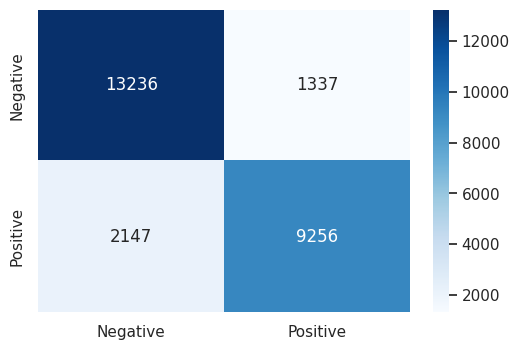

In [ ]:
cf = confusion_matrix(y_test, best_pipe_logreg.predict(X_test))

sns.set(rc = {'figure.figsize' : (6,4)})

ax = sns.heatmap(cf, annot = True, cmap = 'Blues',fmt = 'g')
ax.set_xticklabels(['Negative', 'Positive'])
ax.set_yticklabels(["Negative", 'Positive'])
plt.show()

In [ ]:
print(classification_report(y_test, best_pipe_logreg.predict(X_test)))

              precision    recall  f1-score   support

           0       0.86      0.91      0.88     14573
           1       0.87      0.81      0.84     11403

    accuracy                           0.87     25976
   macro avg       0.87      0.86      0.86     25976
weighted avg       0.87      0.87      0.87     25976



##**Decision Tree Classifier**

In [ ]:
grid_dt = GridSearchCV(pipe_dt, param_dt, cv=5).fit(X_train, y_train)

In [ ]:
print('Train Set Score : ', grid_dt.score(X_train, y_train))
print('Test Set Score : ', grid_dt.score(X_test, y_test))

Train Set Score :  0.9299738219895288
Test Set Score :  0.9287419156144133


In [ ]:
best_param_dt = grid_dt.best_params_
print(best_param_dt)
print('\n')
best_pipe_dt = grid_dt.best_estimator_
print(best_pipe_dt)
print('\n')
result_df_dt = pd.DataFrame.from_dict(grid_dt.cv_results_, orient='columns')
print(result_df_dt.columns)

{'classifier__criterion': 'entropy', 'classifier__max_depth': 7, 'classifier__min_samples_leaf': 7, 'classifier__min_samples_split': 2, 'transformer__scaler': StandardScaler()}


Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f89a465f890>),
                                                 ('encoding', OneHotEncoder(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f89a465f910>)])),
                ('classifier',
                 DecisionTreeClassifier(criterion='entropy', max_depth=7,
                                        min_samples_leaf=7))])


Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_classifier__criterion', 'param_classifier__max_depth',
       'param_classifier__min_samples_lea

In [ ]:
print(classification_report(y_test, best_pipe_dt.predict(X_test)))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94     14573
           1       0.96      0.88      0.92     11403

    accuracy                           0.93     25976
   macro avg       0.93      0.92      0.93     25976
weighted avg       0.93      0.93      0.93     25976



Decision Tree is at good fit after we tune the model

##**Random Forest Classifier**

In [ ]:
grid_rf = GridSearchCV(pipe_rf, param_rf, cv=5).fit(X_train, y_train)

In [ ]:
print('Train Set Score : ', grid_rf.score(X_train, y_train))
print('Test Set Score : ', grid_rf.score(X_test, y_test))

Train Set Score :  0.9299738219895288
Test Set Score :  0.9301663073606405


In [ ]:
best_param_rf = grid_rf.best_params_
print(best_param_rf)
print('\n')
best_pipe_rf = grid_rf.best_estimator_
print(best_pipe_rf)
print('\n')
result_df_rf = pd.DataFrame.from_dict(grid_rf.cv_results_, orient='columns')
print(result_df_rf.columns)

{'classifier__max_depth': 6, 'classifier__n_estimators': 400, 'transformer__scaler': MinMaxScaler()}


Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('scaler', MinMaxScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f89b0a63990>),
                                                 ('encoding', OneHotEncoder(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f89ae8fdb10>)])),
                ('classifier',
                 RandomForestClassifier(max_depth=6, n_estimators=400))])


Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_classifier__max_depth', 'param_classifier__n_estimators',
       'param_transformer__scaler', 'params', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'split3_test_score',
       'split4_test_score', 'mean_test_sco

In [ ]:
print(classification_report(y_test, best_pipe_rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.93      0.94      0.94     14573
           1       0.93      0.91      0.92     11403

    accuracy                           0.93     25976
   macro avg       0.93      0.93      0.93     25976
weighted avg       0.93      0.93      0.93     25976



Random Forest is at good fit after we tune the model

##**XGBoost Classifier**

In [ ]:
grid_xgb = GridSearchCV(pipe_xgb, param_xgb, cv=5).fit(X_train, y_train)

In [ ]:
print('Train Set Score : ', grid_xgb.score(X_train, y_train))
print('Test Set Score : ', grid_xgb.score(X_test, y_test))

Train Set Score :  0.9713966738527872
Test Set Score :  0.9625038497074222


In [ ]:
best_param_xgb = grid_xgb.best_params_
print(best_param_xgb)
print('\n')
best_pipe_xgb = grid_xgb.best_estimator_
print(best_pipe_xgb)
print('\n')
result_df_xgb = pd.DataFrame.from_dict(grid_xgb.cv_results_, orient='columns')
print(result_df_xgb.columns)

{'classifier__learning_rate': 0.1, 'classifier__max_depth': 6, 'classifier__n_estimators': 300, 'transformer__scaler': StandardScaler()}


Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f89b05f5a90>),
                                                 ('encoding', OneHotEncoder(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f89b104c310>)])),
                ('classifier', XGBClassifier(max_depth=6, n_estimators=300))])


Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_classifier__learning_rate', 'param_classifier__max_depth',
       'param_classifier__n_estimators', 'param_transformer__scaler', 'params',
       'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_t

In [ ]:
print(classification_report(y_test, best_pipe_xgb.predict(X_test)))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97     14573
           1       0.97      0.94      0.96     11403

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976



After the parameter tuning, XGBoost has the highest score of all models

#Model After Tuning Comparison

In [ ]:
models = {
    'Logistic Regression' : best_pipe_logreg,
    'Decision Tree' : best_pipe_dt,
    'Random Forest' : best_pipe_rf,
    'XGBoost' : best_pipe_xgb
}

metrics = {
    'Accuracy' : accuracy_score,
    'F1-Score' : f1_score,
}

model_tuning = pd.DataFrame(columns = models.keys(), index=['Accuracy', 'F1-Score'])

for metric in metrics.keys():
  for model in models.keys():
    model_tuning.loc[metric, model] = metrics[metric](y_test, models[model].predict(X_test))

In [ ]:
df_model

,Logistic Regression,Decision Tree,Random Forest,XGBoost
Accuracy,0.865915,0.94518,0.960964,0.938751
F1-Score,0.841646,0.937653,0.954817,0.929122


In [ ]:
model_tuning

,Logistic Regression,Decision Tree,Random Forest,XGBoost
Accuracy,0.865876,0.928742,0.930166,0.962504
F1-Score,0.841608,0.915236,0.919841,0.956603


Based on the comparison between base model and model after tuning, XGBoost is the best model out of all.

#Save model

In [ ]:
import pickle

pickle.dump(best_pipe_xgb, open('model_xgb.pkl', 'wb'))

#Model Inference

In [ ]:
X_train.head()

,Customer Type,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes
0,Loyal Customer,Personal Travel,Eco Plus,460.0,3,4,3,5,3,5,5,4,3,4,4.0,5,5,25.0
1,disloyal Customer,Business travel,Business,235.0,3,2,3,1,3,1,1,1,5,3,1.5,4,1,1.0
2,Loyal Customer,Business travel,Business,1142.0,2,2,2,5,5,5,5,4,3,4,4.0,4,5,0.0
3,Loyal Customer,Business travel,Business,562.0,2,5,5,2,2,2,2,2,5,3,1.5,4,2,11.0
4,Loyal Customer,Business travel,Business,214.0,3,3,3,4,5,5,3,3,4,4,3.0,3,3,0.0


In [ ]:
data = pd.DataFrame({
    'Customer Type' : ['Loyal Customer'],
    'Type of Travel' : ['Business travel'],
    'Class' : ['Eco Plus'],
    'Flight Distance' : [350],
    'Inflight wifi service' : [3],
    'Departure/Arrival time convenient' : [2],
    'Ease of Online booking' : [2],
    'Food and drink' : [3],
    'Online boarding' : [3],
    'Seat comfort' : [3],
    'Inflight entertainment' : [2],
    'On-board service' : [1],
    'Leg room service' : [3],
    'Baggage handling' : [2],
    'Checkin service' : [3],
    'Inflight service' : [3],
    'Cleanliness' : [3],
    'Departure Delay in Minutes' : [20]
})

In [ ]:
pred = best_pipe_xgb.predict(data)
if pred == 1:
  print('This passenger is satisfied')
else:
  print("This passenger is neutral or dissatisfied")

This passenger is neutral or dissatisfied


#Conclusion

---

Using Airline Satisfaction dataset, we have succeeded in predicting will a passenger satisfied or neutral/dissatisified with the airline.

From the EDA, we get that,
* Both female and male equally concerned about the satisfaction, means gender doesn't give a full impact on the result. So we'll likely to drop it.
* Loyal customer gives a high result on the neutral or dissatisfied level. This should be highlighted to maintain the loyal customers.
* Business traveler satisfied more with the airline rather than the personal traveler
* Passenger in business class highly satisfied rather than passenger in economy class highly neutral or dissatisfied.
* Gate location doesn't giving much impact since it gives the same score.
* Age seems quiet balance means it's not necessarily affected much on the target variable
* Neutral or dissatisfied passenger higher than satisfed passenger by 13.4%

Algorithms that we try to find the model are Logistic Regression, Decision Tree Classifier, Random Forest Classifier, and XGBoost Classifier.

We compare the baseline model and model after tuning, these are the result,

**Base model result**

<img src='https://drive.google.com/uc?id=1WD7vhpsU0jmZ27UTmAarAHQ13lF9aOZg'>

**Model after tuning result**

<img src='https://drive.google.com/uc?id=1kx9dJgX-vxEUZN5qCx-V-SBGMR3UxTfO'>

In the base line model, Decision Tree and Random Forest is over-fit to training set, yet after we tune the model, they are at good-fit.

From the accuracy score and F1-Score **the best model out of all the models is XGBoost Model**, so we will use it in the model inference.